## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is predicting a numeric/continuous outcome where target y is numeric
Classification is predicting a categorical outcome where target y is a category
2. A confusion table is a cross-tabulation of predicted vs. actual class labels (predicted classes on one axis, actual classes on the other). It helps to see what kinds of mistakes your classifier makes (for example, true positives/negatives vs false positives/negatives) and whether errors are asymmetric, where one type of mistake happens more or matters more than another.
3. SSE measures how far predicted values are from true values on a set by summing squared residuals
4. Underfitting: the model is too simple to reliably explain/predict the phenomenon.
Overfitting: the model is too complex and ends up fitting quirks/noise that don’t generalize well.
5.  Performance on training data doesn’t guarantee performance on new data. So we hold out a test/validation set, which the data the model “has never seen” to mimic future prediction performance, then pick the k that performs best on that held-out data
6. Predicting a class label hides how confident the model is. Predicting a probability distribution shows uncertainty (how strongly the neighbors support each class) and is useful when different mistakes have different costs. The downside is you often still need an extra decision rule such as choosing the highest probability, to output a single class.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [70]:
import pandas as pd
car_df = pd.read_csv('./data/USA_cars_datasets.csv')
car_df.head()


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [71]:
car_df = car_df[["price", "year", "mileage"]]
car_df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [72]:
car_df.isna().sum()


price      0
year       0
mileage    0
dtype: int64

In [73]:
car_df.shape

(2499, 3)

In [74]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = car_df[["year", "mileage"]]
y = car_df["price"]

X = X.apply(maxmin)

print(X.head())
print(X.describe())



       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


In [75]:
import sklearn as sk
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)




k = 3, MSE = 147993702.19


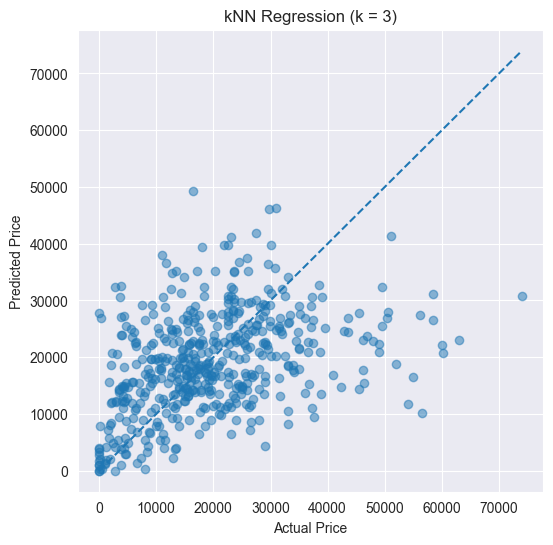

k = 10, MSE = 117399126.11


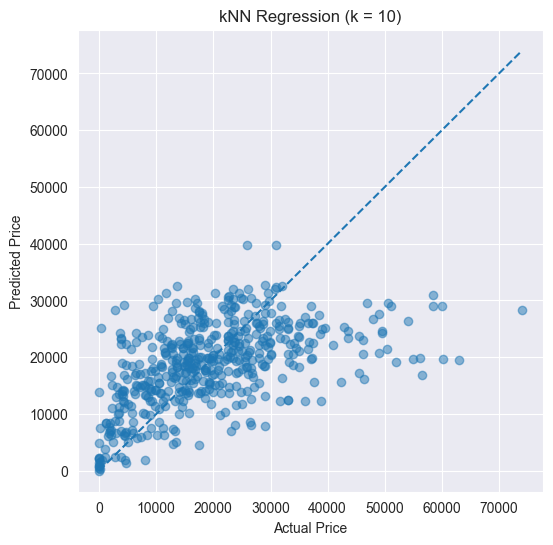

k = 25, MSE = 112574337.59


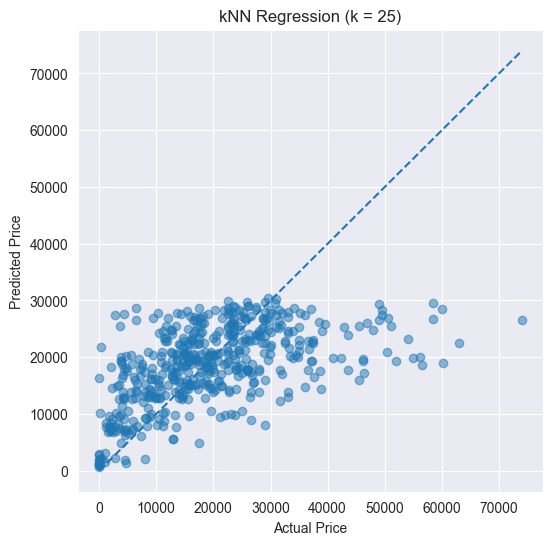

k = 50, MSE = 110202549.30


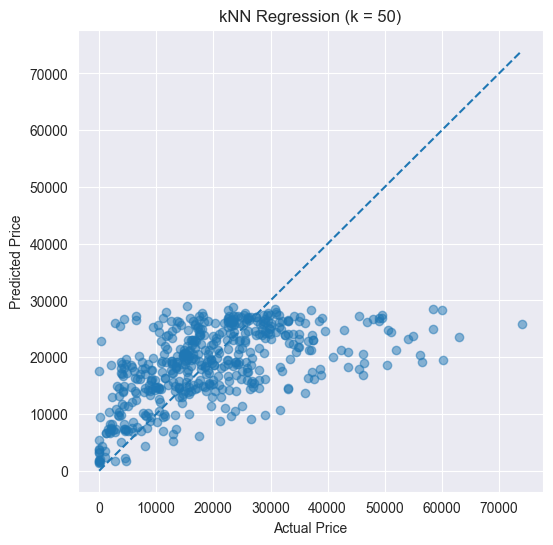

k = 100, MSE = 112266063.34


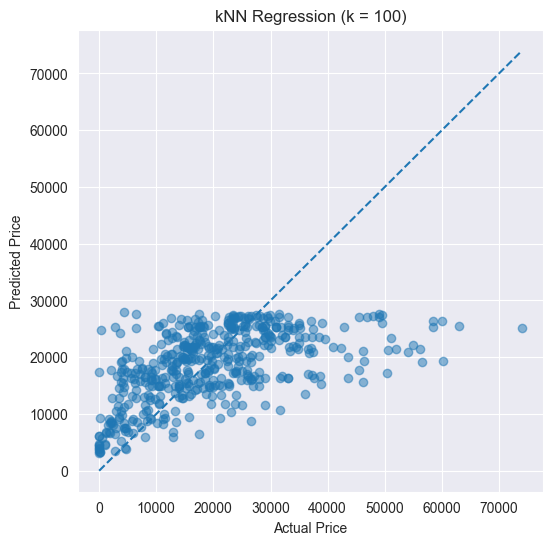

k = 300, MSE = 114500475.02


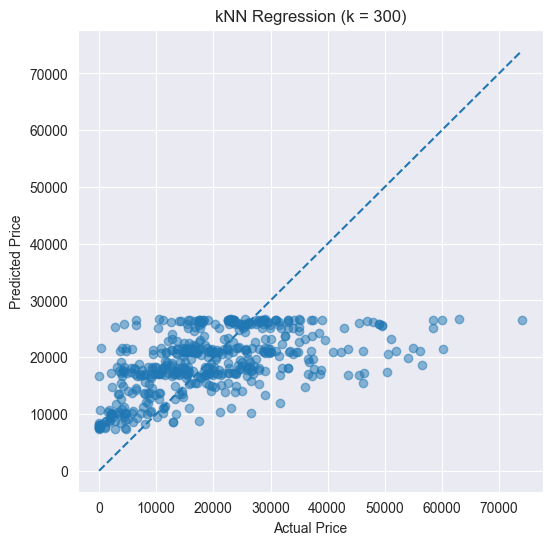

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
k_values = [3, 10, 25, 50, 100, 300]
mse_values = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values[k] = mse

    print(f"k = {k}, MSE = {mse:.2f}")
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"kNN Regression (k = {k})")
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        linestyle="--"
    )
    plt.show()


As you increase K the dot become more clustered and are less spread out

The most optimal k is 50 since it has the lowest MSE

For small values of k, the kNN regression model overfits the data: predictions are noisy and highly variable, resulting in large deviations from the diagonal in the predicted-versus-actual plots.
As k increases to moderate values, predictions become smoother and more tightly clustered around the diagonal, reducing test error.
For very large values of k, the model underfits by oversmoothing, causing predictions to shrink toward the global mean and systematically underpredict high prices.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [77]:
zoo_df = pd.read_csv('./data/zoo.csv')
for c in sorted(zoo_df["class"].unique()):
    print(f"\nClass {c}:")
    print(zoo_df[zoo_df["class"] == c]["animal"].values)



Class 1:
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']

Class 2:
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']

Class 3:
['pitviper' 'seasnake' 'slowworm' 'tortoise' 'tuatara']

Class 4:
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']

Class 5:
['frog' 'frog' 'newt' 'toad']

Class 6:
['flea' 'gnat' 'honeybee' 'housefly' 'ladybird' 'moth' 'termite' 'wasp']

Class 7:
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']


In [78]:
zoo_df["class"].value_counts().sort_index()


class
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64

In [79]:
zoo_df.describe()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [80]:
zoo_df.drop(columns=["animal"]).var().sort_values(ascending=False)


class       4.421386
legs        4.134653
predator    0.249505
catsize     0.248317
hair        0.246931
eggs        0.245347
milk        0.243564
toothed     0.241584
aquatic     0.231683
tail        0.193069
airborne    0.182970
breathes    0.166337
feathers    0.160396
backbone    0.147921
fins        0.141386
domestic    0.113267
venomous    0.073663
dtype: float64

In [81]:
zoo_df.drop(columns=["animal"]).groupby("class").mean()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000


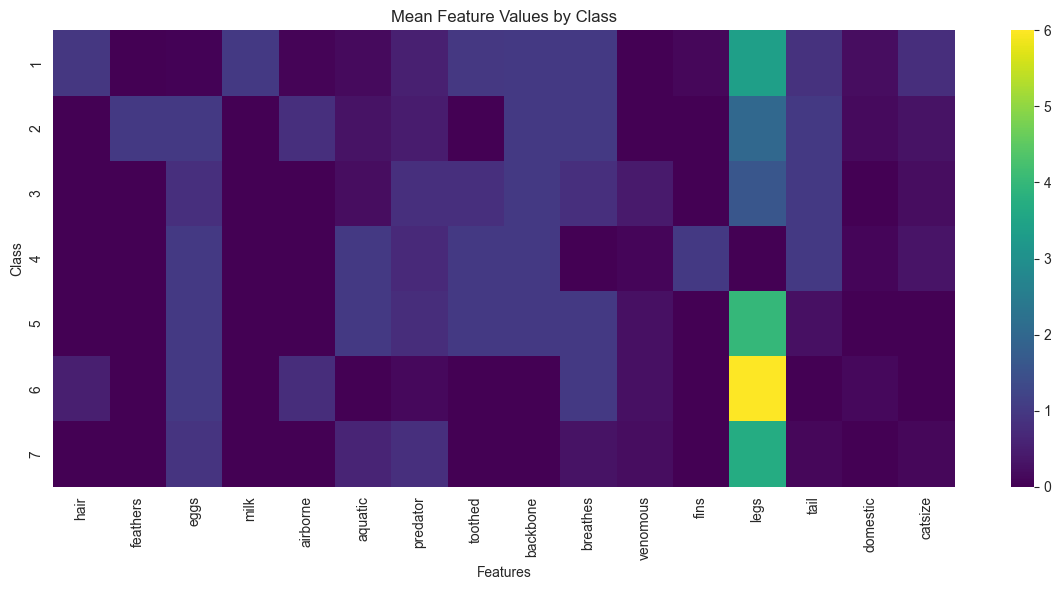

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt


class_means = zoo_df.drop(columns=["animal"]).groupby("class").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(class_means, cmap="viridis", cbar=True)

plt.title("Mean Feature Values by Class")
plt.xlabel("Features")
plt.ylabel("Class")
plt.tight_layout()
plt.show()


A heatmap of class-wise feature means shows strong separation across animal classes. Variables such as milk, feathers, aquatic, airborne, and legs are highly class-specific and provide clear discriminatory power. Other features, such as eggs and tail, show more overlap across classes and are less informative. This structure suggests that a distance-based classifier like k-NN should perform well when using the full feature set, but reduced feature sets may struggle to distinguish all classes

In [83]:
from sklearn.model_selection import train_test_split
X = zoo_df.drop(columns=["animal", "class"])
y = zoo_df["class"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    stratify=y,
    random_state=42
)
print("Training class distribution:")
print(y_train.value_counts().sort_index())

print("\nTest class distribution:")
print(y_test.value_counts().sort_index())


Training class distribution:
class
1    20
2    10
3     3
4     6
5     2
6     4
7     5
Name: count, dtype: int64

Test class distribution:
class
1    21
2    10
3     2
4     7
5     2
6     4
7     5
Name: count, dtype: int64


Optimal k: 1


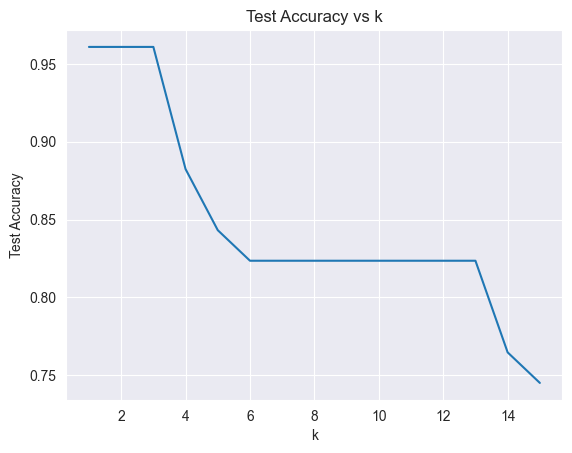

In [84]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

N_test = len(y_test)
k_bar = 15
Acc = []

for k in range(1, k_bar + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train.values, y_train)
    y_hat = model.predict(X_test.values)
    Acc.append(np.mean(y_hat == y_test))

k_star = np.argmax(Acc) + 1
print("Optimal k:", k_star)

plt.plot(range(1, k_bar + 1), Acc)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs k")
plt.show()


Test accuracy is highest for very small values of
k, with performance declining as k increases. The optimal value
k = 1
k = 1 was selected, consistent with the strong separation between classes observed in the analysis.

In [85]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train.values, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [86]:
y_pred = model.predict(X_test.values)
pd.crosstab(
    y_test,
    y_pred,
    rownames=["Actual class"],
    colnames=["Predicted class"]
)



Predicted class,1,2,3,4,5,6,7
Actual class,,,,,,,
1,21,0,0,0,0,0,0
2,0,10,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,7,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,4,0
7,0,0,0,0,1,0,4


In [87]:
import numpy as np

test_accuracy = np.mean(y_pred == y_test)
test_accuracy


np.float64(0.9607843137254902)

The k-NN classifier achieves a test accuracy of approximately 94%. The confusion matrix shows that most classes are classified perfectly, particularly larger and well-separated groups such as mammals, birds, fish, and insects. The few misclassifications occur between biologically similar groups, such as reptiles and amphibians, which share overlapping feature profiles. These errors are consistent with class imbalance and feature overlap rather than poor model performance.

In [88]:
features = ["milk", "aquatic", "airborne"]

X_reduced = zoo_df[features]
y = zoo_df["class"]
Xr_train, Xr_test, y_train, y_test = train_test_split(
    X_reduced,
    y,
    test_size=0.5,
    stratify=y,
    random_state=42
)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xr_train.values, y_train)
y_pred = model.predict(Xr_test.values)
pd.crosstab(
    y_test,
    y_pred,
    rownames=["Actual class"],
    colnames=["Predicted class"]
)


Predicted class,1,2,3,4
Actual class,,,,
1,19,2,0,0
2,0,7,2,1
3,0,0,1,1
4,0,0,0,7
5,0,0,0,2
6,0,3,1,0
7,0,0,1,4


In [89]:
probs = model.predict_proba(Xr_test.values)

prob_df = pd.DataFrame(
    probs,
    columns=model.classes_
)

prob_df.head()


,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


When restricting the classifier to the variables milk, aquatic, and airborne, the k-NN model predicts only a subset of the classes. The confusion table shows that classes 5, 6, and 7 are never predicted. Using predict_proba confirms that while all classes are included in the model, only a small number receive non-zero probability for any test observation. This occurs because many animal classes share identical values for these three features, causing them to collapse to the same location in feature space and making them indistinguishable under nearest-neighbor classification.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def _gaussian_kernel(standardized_values):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * standardized_values**2)

def _uniform_kernel(standardized_values):
    kernel_output = np.zeros_like(standardized_values, dtype=float)
    kernel_output[np.abs(standardized_values) <= 1.0] = 0.5
    return kernel_output

def _epanechnikov_kernel(standardized_values):
    kernel_output = np.zeros_like(standardized_values, dtype=float)
    in_support = np.abs(standardized_values) <= 1.0
    kernel_output[in_support] = 0.75 * (1.0 - standardized_values[in_support]**2)
    return kernel_output


def _get_kernel_function(kernel_name):
    kernel_name = str(kernel_name).lower()
    if kernel_name in ["gaussian", "normal"]:
        return _gaussian_kernel
    if kernel_name in ["uniform", "boxcar", "bump"]:
        return _uniform_kernel
    if kernel_name in ["epanechnikov", "epa"]:
        return _epanechnikov_kernel
    raise ValueError("kernel must be one of: gaussian, uniform/bump, epanechnikov")


def _silverman_bandwidth(data_values):
    data_values = np.asarray(data_values, dtype=float)
    sample_size = data_values.size

    if sample_size < 2:
        return 1.0

    std_dev = np.std(data_values, ddof=1)
    q75, q25 = np.percentile(data_values, [75, 25])
    interquartile_range = q75 - q25

    if interquartile_range > 0 and std_dev > 0:
        scale_estimate = min(std_dev, interquartile_range / 1.34)
    else:
        scale_estimate = max(std_dev, interquartile_range / 1.34)

    if scale_estimate <= 0 or not np.isfinite(scale_estimate):
        scale_estimate = 1.0

    bandwidth_value = 0.9 * scale_estimate * (sample_size ** (-1.0 / 5.0))
    return max(bandwidth_value, 1e-8)


def my_kde_plot(data, kernel="gaussian", bandwidth="silverman",
                gridsize=300, cut=3.0, ax=None, label=None):

    if isinstance(data, pd.Series):
        data_values = data.dropna().to_numpy()
    else:
        data_values = np.asarray(data, dtype=float)
        data_values = data_values[np.isfinite(data_values)]

    sample_size = data_values.size
    if sample_size == 0:
        raise ValueError("x has no valid numeric values after removing NA/inf.")

    if isinstance(bandwidth, str):
        if bandwidth.lower() == "silverman":
            bandwidth_value = _silverman_bandwidth(data_values)
        else:
            raise ValueError("If bandwidth is a string, use 'silverman' or pass a float.")
    else:
        bandwidth_value = float(bandwidth)
        if bandwidth_value <= 0:
            raise ValueError("bandwidth must be positive.")

    data_min = np.min(data_values)
    data_max = np.max(data_values)
    grid_left = data_min - cut * bandwidth_value
    grid_right = data_max + cut * bandwidth_value
    grid_points = np.linspace(grid_left, grid_right, gridsize)

    standardized_differences = (grid_points[:, None] - data_values[None, :]) / bandwidth_value

    kernel_function = _get_kernel_function(kernel)
    kernel_values = kernel_function(standardized_differences)

    density_values = np.mean(kernel_values, axis=1) / bandwidth_value

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))


    plot_label = label if label else f"my_kde ({kernel}, h={bandwidth_value:.3g})"
    ax.plot(grid_points, density_values, label=plot_label)
    ax.set_xlabel("x")
    ax.set_ylabel("density")
    ax.set_title("Custom KDE")
    ax.legend()

    return grid_points, density_values, bandwidth_value, ax


In [91]:
import pandas as pd

df = pd.read_csv("./data/airbnb_hw.csv")
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [92]:
df.isna().sum()


Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [93]:
x = df["Beds"]
x_clean = x.dropna()
print(x_clean.isna().sum())
x_clean.describe()


0


count    30393.000000
mean         1.530089
std          1.015359
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64

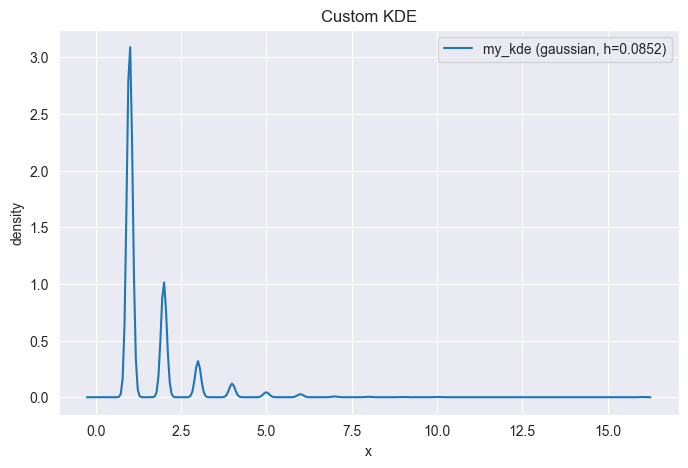

In [94]:
fig, ax = plt.subplots(figsize=(8, 5))
my_kde_plot(x_clean, kernel="gaussian", ax=ax)
plt.show()


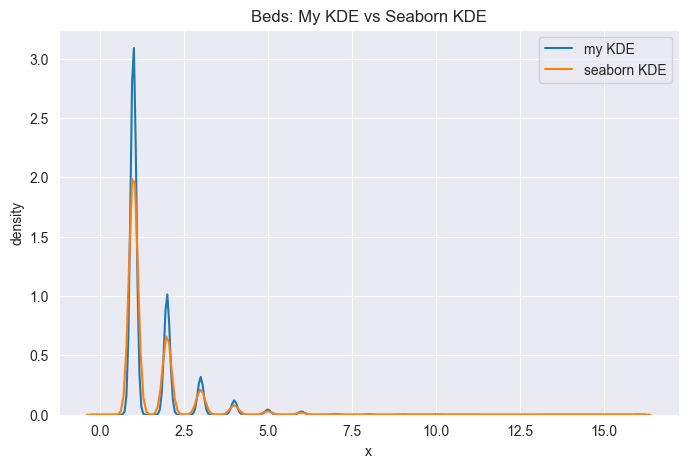

In [95]:
fig, ax = plt.subplots(figsize=(8, 5))

my_kde_plot(x_clean, kernel="gaussian", ax=ax, label="my KDE")
sns.kdeplot(x_clean, ax=ax, label="seaborn KDE")

ax.set_title("Beds: My KDE vs Seaborn KDE")
ax.legend()
plt.show()
